In [33]:
# importing plotting functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tsdisagg import disaggregate_series


In [56]:
# Getting fred indicators and saving an excel version to see all values aside and rename 
from pandas_datareader.fred import FredReader
fred_indicators = ['IRLTLT01DKQ156N', 'NAEXKP01DKQ189S', 'NAEXKP02DKQ189S', 'NAEXKP04DKQ189S', 'RKNANPDKA666NRUG', 'DNKLOCOSTORSTM', 'NAEXKP06DKQ652S', 'NAEXKP07DKQ652S']

df = FredReader(symbols=fred_indicators, start='1900-01-01', end=None, freq ='Q').read()

df.rename(columns={
    'IRLTLT01DKQ156N': 'Bonds', #monthly 
    'NAEXKP01DKQ189S': 'Y',
    'NAEXKP02DKQ189S': 'C',
    'NAEXKP04DKQ189S': 'K formation',
    'RKNANPDKA666NRUG': 'stock', #annual
    'DNKLOCOSTORSTM': 'r', #monthly 
    'NAEXKP06DKQ652S': 'Exports',
    'NAEXKP07DKQ652S': 'Imports'
}, inplace=True)
df.to_csv('custom_df.csv')
df
# all are type float64, the date is already an indicator 

,Bonds,Y,C,K formation,stock,r,Exports,Imports
DATE,,,,,,,,
1950-01-01,NaN,NaN,NaN,NaN,203497.859375,NaN,NaN,NaN
1951-01-01,NaN,NaN,NaN,NaN,206158.671875,NaN,NaN,NaN
1952-01-01,NaN,NaN,NaN,NaN,208901.093750,NaN,NaN,NaN
1953-01-01,NaN,NaN,NaN,NaN,214274.093750,NaN,NaN,NaN
1954-01-01,NaN,NaN,NaN,NaN,220242.234375,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-10-01,2.420667,5.719180e+11,2.528550e+11,1.385479e+11,NaN,1.25,3.607410e+11,3.201785e+11
2022-11-01,NaN,NaN,NaN,NaN,NaN,1.25,NaN,NaN
2023-01-01,2.509667,5.779868e+11,2.534612e+11,1.187667e+11,NaN,NaN,3.741787e+11,3.156046e+11


In [4]:
#make it prettier 
df.head()

,Bonds,Y,C,K formation,stock,r,Exports,Imports
DATE,,,,,,,,
1950-01-01,NaN,NaN,NaN,NaN,203497.859375,NaN,NaN,NaN
1951-01-01,NaN,NaN,NaN,NaN,206158.671875,NaN,NaN,NaN
1952-01-01,NaN,NaN,NaN,NaN,208901.093750,NaN,NaN,NaN
1953-01-01,NaN,NaN,NaN,NaN,214274.093750,NaN,NaN,NaN
1954-01-01,NaN,NaN,NaN,NaN,220242.234375,NaN,NaN,NaN


<Axes: xlabel='DATE'>

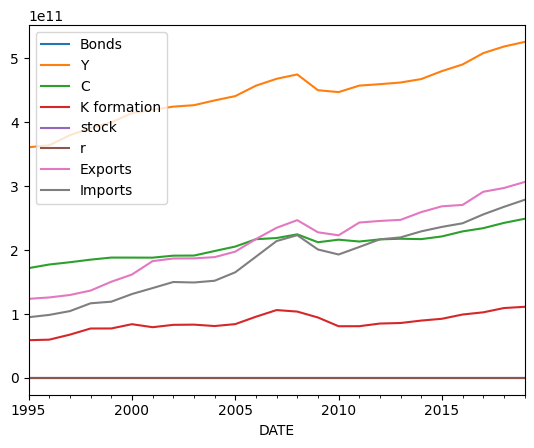

In [5]:
#let's take a look before we add wages and hours worked, we dropna so it looks nicer although it only starts at 1995 --> need to inquire about the best strategy here 
df.dropna().plot()

<Axes: xlabel='DATE'>

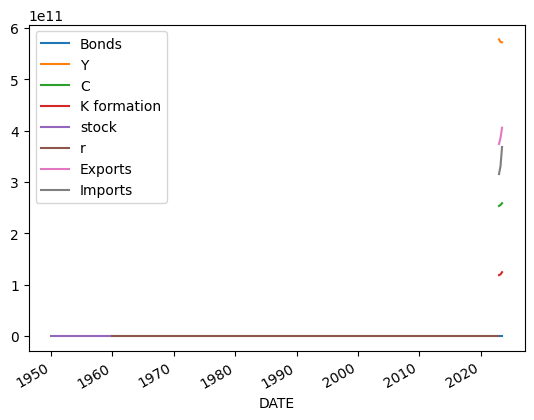

In [6]:
#othewise, this is what the plot would look like 
df.plot()

In [113]:
#setting it up in years so it stops giving me missing values error since im going from low to higher frequency with stocks 
stock = df.resample('YS').mean()['stock'].dropna()
stock_quarterly = disaggregate_series(stock, target_freq='QS', agg_func='sum')
#turning monthly into QS
df_quarterly = df.resample('QS').mean()
# changing columns to the Q freq
df_quarterly['stock'] = stock_quarterly
df_quarterly
# stock_quarterly

,Bonds,Y,C,K formation,stock,r,Exports,Imports
DATE,,,,,,,,
1950-01-01,NaN,NaN,NaN,NaN,50739.900238,NaN,NaN,NaN
1950-04-01,NaN,NaN,NaN,NaN,50793.726080,NaN,NaN,NaN
1950-07-01,NaN,NaN,NaN,NaN,50901.377765,NaN,NaN,NaN
1950-10-01,NaN,NaN,NaN,NaN,51062.855292,NaN,NaN,NaN
1951-01-01,NaN,NaN,NaN,NaN,51278.158662,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-07-01,1.720333,5.704050e+11,2.535687e+11,1.220930e+11,NaN,0.216667,3.617697e+11,3.143486e+11
2022-10-01,2.420667,5.719180e+11,2.528550e+11,1.385479e+11,NaN,1.250000,3.607410e+11,3.201785e+11
2023-01-01,2.509667,5.779868e+11,2.534612e+11,1.187667e+11,NaN,NaN,3.741787e+11,3.156046e+11


<Axes: xlabel='Time'>

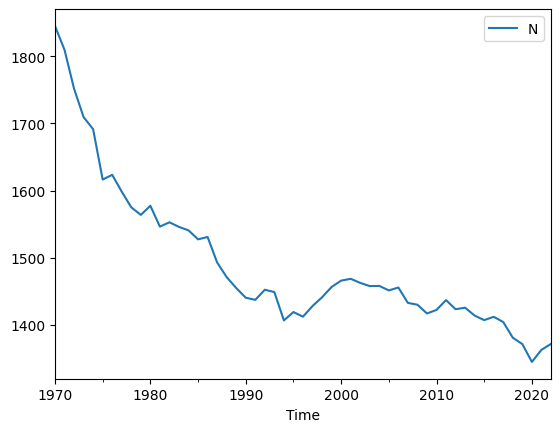

In [25]:
# we retrieve hours worked and only consider total employment instead of total and temporary employment 
df1 = pd.read_csv('https://stats.oecd.org/SDMX-JSON/data/ANHRS/DNK.DE+TE.A/OECD?contentType=csv')
df1.to_csv('df1.csv')
df1 = df1[df1['Employment status'] == 'Total employment']
df1.head(2)
# we specify the columns we want 
hours = df1.loc[:,['Time','Value']]
# we rename 
hours = hours.rename(columns= {'Value': 'N'})
# we turn date into an index similarly to the previous df 
hours['Time'] = pd.to_datetime(hours['Time'], format='%Y')
hours.set_index('Time', inplace=True)
# let's plot
hours.dropna().plot()

In [26]:
#setting up the appropriate dataframe
quarterly_hours_time = hours.resample('QS').mean()

In [27]:
quarterly_hours_time

,N
Time,
1970-01-01,1845.348421
1970-04-01,NaN
1970-07-01,NaN
1970-10-01,NaN
1971-01-01,1809.736017
...,...
2021-01-01,1362.879134
2021-04-01,NaN
2021-07-01,NaN


In [28]:
#turning from low to high frequency 
quarterly_N = disaggregate_series(hours, target_freq='QS', agg_func='sum')
quarterly_N

1970-01-01    462.788670
1970-04-01    462.208044
1970-07-01    461.046792
1970-10-01    459.304914
1971-01-01    456.982409
                 ...    
2021-10-01    342.374966
2022-01-01    342.655797
2022-04-01    342.866420
2022-07-01    343.006836
2022-10-01    343.077043
Freq: QS-OCT, Name: N, Length: 212, dtype: float64

In [29]:
# bringing the new Q values to the dataframe 
quarterly_hours_time['N'] = quarterly_N
quarterly_hours_time

,N
Time,
1970-01-01,462.788670
1970-04-01,462.208044
1970-07-01,461.046792
1970-10-01,459.304914
1971-01-01,456.982409
...,...
2021-01-01,338.571026
2021-04-01,340.332581
2021-07-01,341.600561


In [80]:
# we retrieve wages 
df2 = pd.read_csv('https://stats.oecd.org/SDMX-JSON/data/EAR_MEI/LCEAMN01_IXOB+LCEAMN01_IXOBSA+LCEAPR_IXOBSA.DNK.Q/OECD?contentType=csv', parse_dates=['Time'], infer_datetime_format=True)
df2.to_csv('df2.csv')
df2.head(2)

C:\Users\Gaya\AppData\Local\Temp\ipykernel_6536\2338959009.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df2 = pd.read_csv('https://stats.oecd.org/SDMX-JSON/data/EAR_MEI/LCEAMN01_IXOB+LCEAMN01_IXOBSA+LCEAPR_IXOBSA.DNK.Q/OECD?contentType=csv', parse_dates=['Time'], infer_datetime_format=True)
C:\Users\Gaya\AppData\Local\Temp\ipykernel_6536\2338959009.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2 = pd.read_csv('https://stats.oecd.org/SDMX-JSON/data/EAR_MEI/LCEAMN01_IXOB+LCEAMN01_IXOBSA+LCEAPR_IXOBSA.DNK.Q/OECD?contentType=csv', parse_dates=['Time'], infer_datetime_format=True)


,SUBJECT,Subject,LOCATION,Country,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,LCEAMN01_IXOB,"Manufacturing, Index",DNK,Denmark,Q,Quarterly,1971-Q1,Q1-1971,IDX,Index,0,Units,2015_100,2015=100,6.801153,NaN,NaN
1,LCEAMN01_IXOB,"Manufacturing, Index",DNK,Denmark,Q,Quarterly,1971-Q2,Q2-1971,IDX,Index,0,Units,2015_100,2015=100,7.283459,NaN,NaN


In [94]:
# we choose manufacturing wages specifically to exclude agricultural wages 
wages = df2.loc[:,['Time', 'Subject','Value']]
wages = wages[wages['Subject'] == 'Manufacturing, Index']
# we rename 
wages = wages.rename(columns= {'Value': 'w'})
wages.info()


<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     210 non-null    object 
 1   Subject  210 non-null    object 
 2   w        210 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.6+ KB


<Axes: xlabel='Time'>

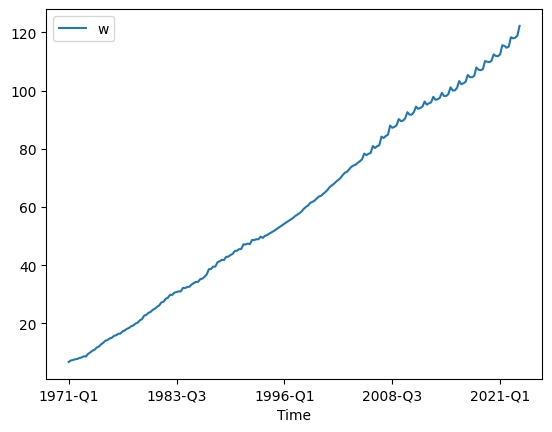

In [95]:
wages['Time'] = wages['Time'].apply(lambda x: x[3:] + "-" + "Q" + x[1])
wages.set_index('Time', inplace=True)
wages.head()
wages.dropna().plot()
# wages.resample('QS').mean()

In [112]:
merged = pd.concat([df_quarterly, hours, wages], axis=1)
print(merged)

                     Bonds   Y   C  K formation         stock   r  Exports  \
1950-01-01 00:00:00    NaN NaN NaN          NaN  50739.900238 NaN      NaN   
1950-04-01 00:00:00    NaN NaN NaN          NaN  50793.726080 NaN      NaN   
1950-07-01 00:00:00    NaN NaN NaN          NaN  50901.377765 NaN      NaN   
1950-10-01 00:00:00    NaN NaN NaN          NaN  51062.855292 NaN      NaN   
1951-01-01 00:00:00    NaN NaN NaN          NaN  51278.158662 NaN      NaN   
...                    ...  ..  ..          ...           ...  ..      ...   
2022-Q2                NaN NaN NaN          NaN           NaN NaN      NaN   
2022-Q3                NaN NaN NaN          NaN           NaN NaN      NaN   
2022-Q4                NaN NaN NaN          NaN           NaN NaN      NaN   
2023-Q1                NaN NaN NaN          NaN           NaN NaN      NaN   
2023-Q2                NaN NaN NaN          NaN           NaN NaN      NaN   

                     Imports   N               Subject         

In [ ]:
#need to remove the subject column and plot 